## Introduction

In this notebook, we use PaSDqc to explore the properties of individual chromosomes within a sample and use those properties to classify chromosomes as either copy neutral and well amplified, possible copy gain, possible copy loss, or poorly amplified. We use micronucleated single-cells sequenced by [Zhang et al, 2015](https://www.nature.com/articles/nature14493).

We also demonstrate the convenience functions that PaSDqc includes to perform amplicon distribution estimation. These functions abstract away the technicalities demonstrated in 02_example-basic_PSD.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
# import matplotlib.gridspec as gridspec
import seaborn as sns
import pathlib

import PaSDqc

%matplotlib inline

In [2]:
sns.set_context('poster')
sns.set_style("ticks", {'ytick.minor.size': 0.0, 'xtick.minor.size': 0.0})

## Load the data 
(same data used in 01_example_report)

In [3]:
p = pathlib.Path("../01_example_report/psd/")
f_psd_list = sorted(p.glob("*.spec"))

psd_list = [PaSDqc.PSDTools.SamplePSD.load_from_file(str(f), name=f.stem) for f in f_psd_list]
med_list = [PaSDqc.PSDTools.normalize_psd(psd.avg_PSD()) for psd in psd_list]

In [4]:
freq = psd_list[0].freq
period = 1 / freq

## Calculate chromosome properties and classify

### 1. fit erf curves to chrom and sample PSDs

In [5]:
chroms = PaSDqc.extra_tools.chroms_from_build('grch37')
[psd.fit_chrom_curves(chroms) for psd in psd_list]
[psd.fit_sample_curves() for psd in psd_list];

### 2. Calculate chromosomal properties

In [6]:
[psd.calc_chrom_props(chroms) for psd in psd_list];

In [7]:
psd_list[0].chrom_props

,KL,sub,supra,min_pos,median,mean,lower,upper,classif
1,0.008277,1.158352,12.567109,1395,9866,15760,2008,48548,Pass
2,0.006165,1.396898,12.350987,1502,9809,15641,2019,47845,Pass
3,0.009098,1.524423,12.977493,1367,10553,16959,2119,52678,Pass
4,0.013150,0.944059,12.037820,0,11147,18855,2070,60529,Pass
5,0.009743,1.198319,11.983481,0,10725,17047,2183,52678,Pass
6,0.009160,1.349496,12.910527,959,10142,15892,2129,48410,Pass
7,0.008828,1.344177,12.859760,0,10103,16623,1944,52086,Pass
8,0.010840,1.388128,13.579427,1111,11871,20570,2113,65782,Pass
9,0.013699,1.019437,11.846513,1288,9602,15394,1966,47338,Pass
10,0.013026,1.155810,13.097158,932,9468,15411,1878,48068,Pass


### 3. Summarize chromosome classifications by sample

In [8]:
idx = [psd.name.split('.')[0] for psd in psd_list]
df_stat = PaSDqc.extra_tools.summarize_chrom_classif_by_sample(psd_list, idx)

In [9]:
df_stat.iloc[0:5, 0:12]

,1,2,3,4,5,6,7,8,9,10,11,12
MN1_a,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Possible gain
MN1_b,Possible loss,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Possible gain
MN2_a,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Possible gain
MN2_b,Pass,Possible loss,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Possible gain
MN3_a,Pass,Possible gain,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Possible gain


### 4. Calculate chromosome amplicon distribution curves

In [10]:
[psd.infer_chrom_amplicon_dist(chroms) for psd in psd_list];

In [11]:
psd_list[0].chrom_dist.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])

## Calculate Sample properties and distributions

In [12]:
[psd.calc_sample_props() for psd in psd_list];
[psd.infer_sample_amplicon_dist() for psd in psd_list];

In [13]:
PaSDqc.extra_tools.summarize_sample_props(psd_list, idx)

,amplicon median,mean size,lower size,upper size
MN1_a,10203,16593,2012,51998
MN1_b,10549,16356,2270,48877
MN2_a,9663,16336,1799,52539
MN2_b,8186,15376,1308,52245
MN3_a,10523,17585,1996,55422
MN3_b,9923,16380,1903,51797
MN4_a,8598,14168,1643,44887
MN4_b,9207,15463,1722,49254
MN5_a,9900,16293,1910,51125
MN5_b,10154,15931,2169,48395


## Figure 5

### 1. Load CNV data

In [14]:
df_cnvs = pd.read_table("CNVs_Zhang_2015_MN.txt", index_col=0)
columns = [c for c in df_cnvs.columns if c.startswith('MN')]
cols2 = [c.split('.')[0] for c in columns]
df_cnv2 = df_cnvs.loc[:, columns].iloc[:-2, :] - df_cnvs[columns].iloc[:-2, :].median() # removing sex chromosomes
df_cnv2.index = [c.replace('chr', '') for c in df_cnv2.index]
df_cnv2.columns = cols2

# Mask MN9_d since CNV caller failed
mask = (df_cnv2 == 0)
mask.loc[:, 'MN9_d'] = True

### 2. Function for heatmap plotting

In [15]:
def plot_cnv_heatmap(df_cnv, ax=None, add_cbar=True, cbar_ax=None):

    if not ax:
        f = plt.figure()
        ax = f.add_subplot(111)

    nd = df_cnv.T.as_matrix()
    np_mask = np.ma.array(nd, mask=mask.T)

    dcp = sns.diverging_palette(255, 133, l=60, n=7)
    dcp_list = [dcp[0], dcp[1], dcp[2], dcp[3], dcp[3], dcp[3], dcp[3], dcp[4], dcp[5], dcp[6]]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', dcp_list)
    
    cax = ax.imshow(np_mask, aspect='equal', cmap=cmap, interpolation=None, vmax=1, vmin=-1)
    ax.set_yticks(np.arange(0, df_cnv2.shape[1]))
    ax.set_xticks(np.arange(0, df_cnv2.shape[0]))
    ax.set_xticks(np.arange(0.5, df_cnv2.shape[0]+0.5), minor=True)
    ax.set_xlabel('chromosome')

    for y in np.arange(0.5, df_cnv2.shape[1], 1):
        ax.axhline(y, linestyle='--', color='black', linewidth=1)

    ax.set_yticklabels([])
    ax.set_yticklabels([s.replace('_', '') for s in df_cnv2.columns])

    ax.set_xticklabels(df_cnv2.index);
    ax.grid(which='minor', color='black', linewidth=1)

    #colorbar
    if add_cbar:
        cbar = ax.figure.colorbar(cax, ticks=[-1, 0, 1], cax=cbar_ax, orientation='horizontal')
        cbar.ax.set_xticklabels(['Loss', 'Neutral', 'Gain'])
        cbar.ax.xaxis.tick_top()
        cbar.ax.tick_params(axis='x', which='major', pad=0)

### 3. Extract MN2b data

In [16]:
MN2b = psd_list[3]
MN2b_kl = MN2b.KL_div_by_chrom()
freq = MN2b.ampl.freq['erf']

# Sample curves
MN2b_fit = MN2b.sample_curves['avg']
MN2b_fit_lower = MN2b.sample_curves['lower']
MN2b_fit_upper = MN2b.sample_curves['upper']
MN2b_dist = MN2b.sample_dist

# Chrom curves
MN2b_chr2_fit = MN2b.chrom_curves['2']
MN2b_chr2_dist = MN2b.chrom_dist['2']

MN2b_chr12_fit = MN2b.chrom_curves['12']
MN2b_chr12_dist = MN2b.chrom_dist['12']

MN2b_chr21_fit = MN2b.chrom_curves['21']
MN2b_chr21_dist = MN2b.chrom_dist['21']

/home/mas138/anaconda3/envs/test1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



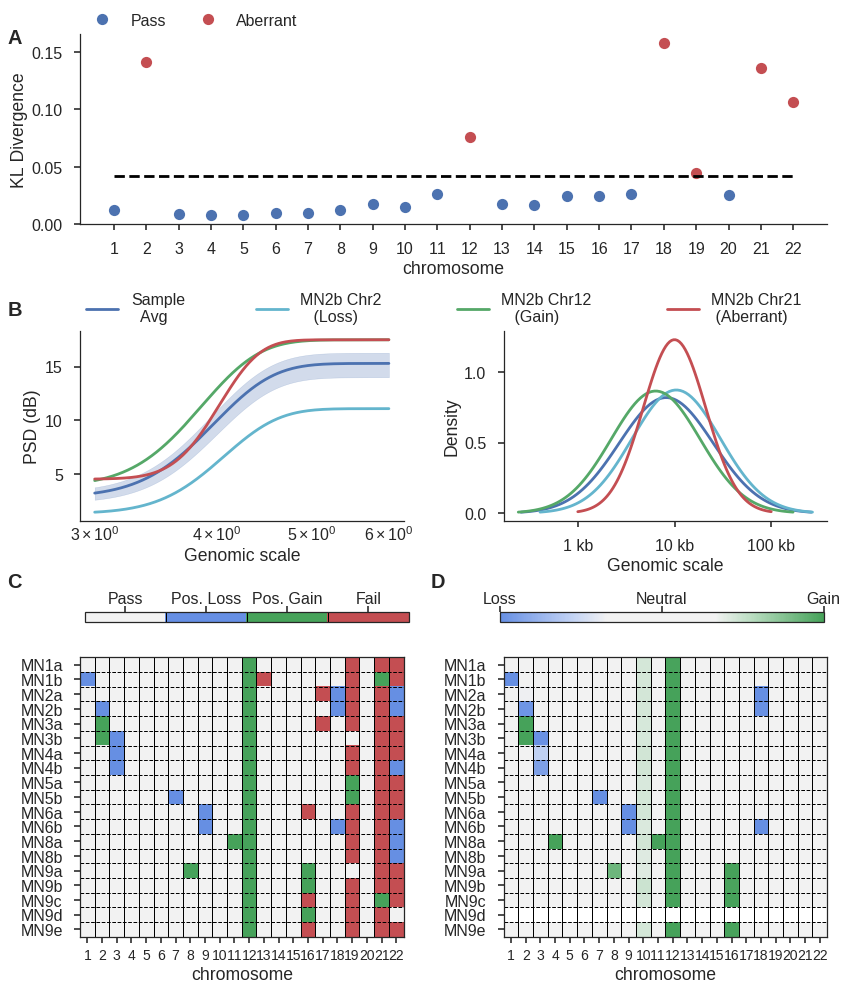

In [17]:
# MAKE A GIANT FIGURE
f = plt.figure(figsize=(12, 14))
ax0 = plt.subplot2grid((7, 6), (0, 0), colspan=6, rowspan=2)

ax1 = plt.subplot2grid((7, 6), (2, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid((7, 6), (2, 3), colspan=3, rowspan=2)

ax3 = plt.subplot2grid((7, 6), (4, 0), colspan=3, rowspan=3)
ax3_cbar = f.add_axes([0.11, 0.39, 0.375, 0.01])
ax4 = plt.subplot2grid((7, 6), (4, 3), colspan=3, rowspan=3)
ax4_cbar = f.add_axes([0.11+0.48, 0.39, 0.375, 0.01])
cp = sns.color_palette()

## KL divergence plot
PaSDqc.extra_tools.plot_KL_div_by_chrom(MN2b_kl, ax=ax0)

##  Smooth spectrograms
ax1.plot(freq, MN2b_fit, label='Sample\n  Avg')
ax1.fill_between(freq, MN2b_fit_lower, MN2b_fit_upper, color=cp[0], alpha=0.25)
ax1.plot(freq, MN2b_chr2_fit, label='MN2b Chr2 \n   (Loss)', color=cp[5])
ax1.plot(freq, MN2b_chr12_fit, label='MN2b Chr12 \n   (Gain)', color=cp[1])
ax1.plot(freq, MN2b_chr21_fit, label='MN2b Chr21\n (Aberrant)', color=cp[2])
ax1.set_xscale('log')
ax1.set_xticklabels(["0", "100 bp", "1 kb", "10 kb", "100 kb", "1 mb"])
ax1.set_xlabel('Genomic scale')
ax1.set_ylabel('PSD (dB)')
ax1.legend(bbox_to_anchor=(0, 1, 2.25, .102), loc=(0, 0), ncol=5, mode="expand", borderaxespad=0.)

## Distribution Plots
ax2.plot(MN2b_dist['freq'], MN2b_dist['dist'], label='MN3 Sample Avg', color=cp[0])
ax2.plot(MN2b_chr2_dist['freq'], MN2b_chr2_dist['dist'], label='MN3 chr2 (loss)', color=cp[5])
ax2.plot(MN2b_chr12_dist['freq'], MN2b_chr12_dist['dist'], label='MN3 chr12 (gain)', color=cp[1])
ax2.plot(MN2b_chr21_dist['freq'], MN2b_chr21_dist['dist'], label='MN3 chr21 (aberrant)', color=cp[2])

ax2.set_xscale('log')
ax2.set_xticklabels(["0", "100 bp", "1 kb", "10 kb", "100 kb", "1 mb"])
ax2.set_xlabel('Genomic scale')
ax2.set_ylabel('Density')


PaSDqc.extra_tools.plot_chrom_classification(df_stat, ax=ax3, cbar_ax=ax3_cbar)
ax3.tick_params(axis='x', which='major', labelsize=14, pad=5)

plot_cnv_heatmap(df_cnv2, ax=ax4, cbar_ax=ax4_cbar)
ax4.tick_params(axis='x', which='major', labelsize=14, pad=5)

plt.tight_layout(h_pad=2.5)
sns.despine(ax=ax0)
sns.despine(ax=ax1)
sns.despine(ax=ax2)

f.text(0.02, 0.97, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
f.text(0.02, 0.70, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
#f.text(0.49, 0.66, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
f.text(0.02, 0.43, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
f.text(0.51, 0.43, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)